In [28]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prophet
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
pollution = pd.read_csv(
    "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/"
    "Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv"
)
len(pollution)

331

In [11]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [12]:
pollution = pollution.rename(
    columns={
        "Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))": "SPM",
        "Smoke (Fouquet and DPCC (2011))": "Smoke",
        "Entity": "City",
    }
)
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [13]:
pollution.City.unique()

array(['Delhi', 'London'], dtype=object)

In [14]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [15]:
pollution["Year"] = pollution["Year"].apply(
    lambda x: datetime.datetime.strptime(str(x), "%Y")
)
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [16]:
pollution.isnull().mean()

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [17]:
pollution.describe()

,Smoke,SPM
count,301.000000,331.000000
mean,210.296440,365.970050
std,88.543288,172.512674
min,13.750000,15.000000
25%,168.571429,288.474026
50%,208.214286,375.324675
75%,291.818182,512.609209
max,342.857143,623.376623


Text(0, 0.5, 'Frequency')

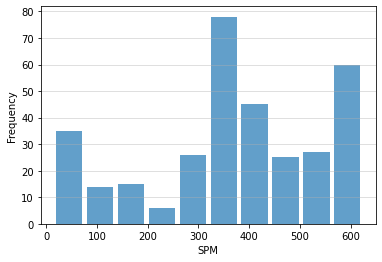

In [18]:
plt.grid(axis="y", alpha=0.5)
n, bins, patches = plt.hist(x=pollution["SPM"], bins="auto", alpha=0.7, rwidth=0.85)

plt.xlabel("SPM")
plt.ylabel("Frequency")

In [19]:
def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]


stats.pearsonr(*ignore_nans(pollution["Smoke"], pollution["SPM"]))

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

Text(333.4714285714286, 0.5, 'SPM')

<Figure size 864x432 with 0 Axes>

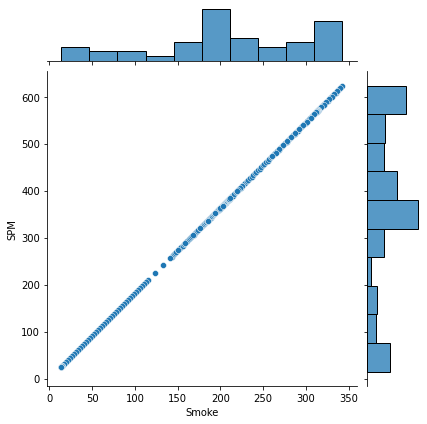

In [20]:
plt.figure(figsize=(12, 6))
sns.jointplot(x="Smoke", y="SPM", edgecolor="white", data=pollution)
plt.xlabel("Smoke")
plt.ylabel("SPM")

Text(0, 0.5, 'SPM')

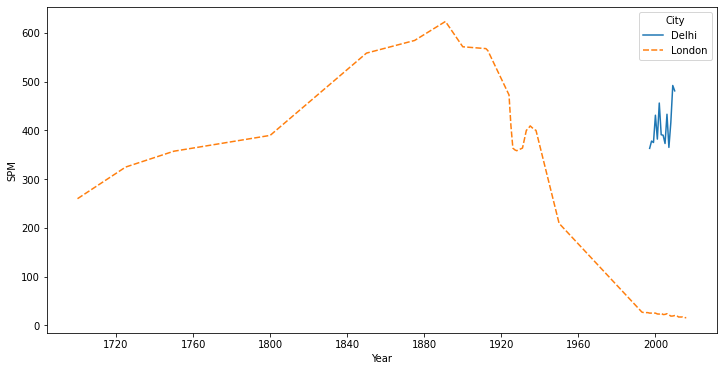

In [21]:
pollution = pollution.pivot("Year", "City", "SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel("SPM")